<a href="https://colab.research.google.com/github/irawan555/MachineLearningTasks/blob/main/2ndWeekTasks/Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Irawan Mardiansyah

NIM : 1103210174

Kelas : TK4504

Logistic Regression Model

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
gender = pd.read_csv('/content/drive/MyDrive/Dataset/gender.csv')

In [4]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Gender           131 non-null    object 
 1    Age              131 non-null    int64  
 2    Height (cm)      131 non-null    int64  
 3    Weight (kg)      131 non-null    int64  
 4    Occupation       131 non-null    object 
 5    Education Level  131 non-null    object 
 6    Marital Status   131 non-null    object 
 7    Income (USD)     131 non-null    int64  
 8    Favorite Color   131 non-null    object 
 9   Unnamed: 9        0 non-null      float64
dtypes: float64(1), int64(4), object(5)
memory usage: 10.4+ KB


In [5]:
data = pd.get_dummies(gender)
data

,Age,Height (cm),Weight (kg),Income (USD),Unnamed: 9,Gender_ female,Gender_ male,Gender_female,Gender_male,Occupation_ Accountant,...,Favorite Color_ Yellow,Favorite Color_Black,Favorite Color_Blue,Favorite Color_Green,Favorite Color_Grey,Favorite Color_Orange,Favorite Color_Pink,Favorite Color_Purple,Favorite Color_Red,Favorite Color_Yellow
0,32,175,70,75000,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25,182,85,45000,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,41,160,62,120000,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,38,178,79,90000,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29,165,58,35000,NaN,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,32,170,64,60000,NaN,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
127,38,176,79,90000,NaN,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
128,27,162,55,55000,NaN,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
129,33,175,77,80000,NaN,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
gender.describe()

,Age,Height (cm),Weight (kg),Income (USD),Unnamed: 9
count,131.000000,131.000000,131.000000,131.000000,0.0
mean,34.564885,173.198473,71.458015,93206.106870,NaN
std,5.984723,8.045467,12.648052,74045.382919,NaN
min,24.000000,160.000000,50.000000,30000.000000,NaN
25%,29.000000,166.000000,60.000000,55000.000000,NaN
50%,34.000000,175.000000,75.000000,75000.000000,NaN
75%,39.000000,180.500000,83.000000,100000.000000,NaN
max,52.000000,190.000000,94.000000,500000.000000,NaN


In [7]:
gender.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color,Unnamed: 9
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue,NaN
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green,NaN
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple,NaN
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red,NaN
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow,NaN


In [8]:
gender.columns

Index([' Gender', ' Age', ' Height (cm)', ' Weight (kg)', ' Occupation',
       ' Education Level', ' Marital Status', ' Income (USD)',
       ' Favorite Color', 'Unnamed: 9'],
      dtype='object')

<ipython-input-9-4a3a90f48473>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(gender.corr(),annot=True)


<Axes: >

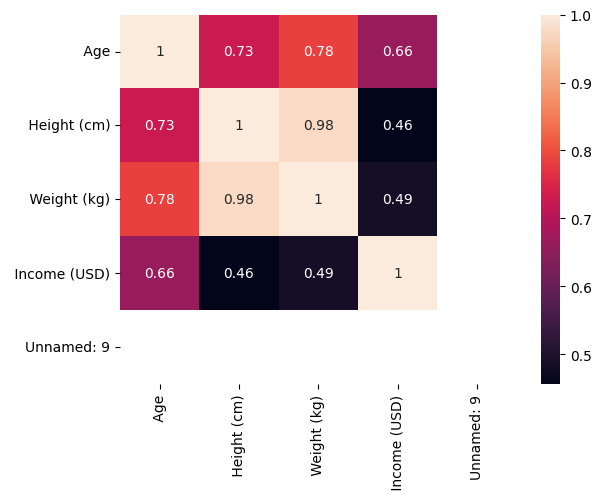

In [9]:
sns.heatmap(gender.corr(),annot=True)

In [10]:
gender.replace(to_replace={'male':1, 'female':0})

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color,Unnamed: 9
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue,NaN
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green,NaN
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple,NaN
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red,NaN
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow,NaN
...,...,...,...,...,...,...,...,...,...,...
126,0,32,170,64,Nurse,Associate's Degree,Single,60000,Orange,NaN
127,1,38,176,79,Project Manager,Bachelor's Degree,Married,90000,Black,NaN
128,0,27,162,55,Graphic Designer,Associate's Degree,Single,55000,Green,NaN
129,1,33,175,77,Sales Representative,Bachelor's Degree,Married,80000,Yellow,NaN
